# Завдання №1
Модифікувати функцію HH для впливу вхідного струму довільної форми (замість постійного рівня вхідного струму) та із застосуванням ODE розрахунку моделі (odeint із scipy.integrate).

Застосувати стимуляцію вхідним струмом, вивести на підграфіки вхідний струм і відповідний йому потенціал нейрона

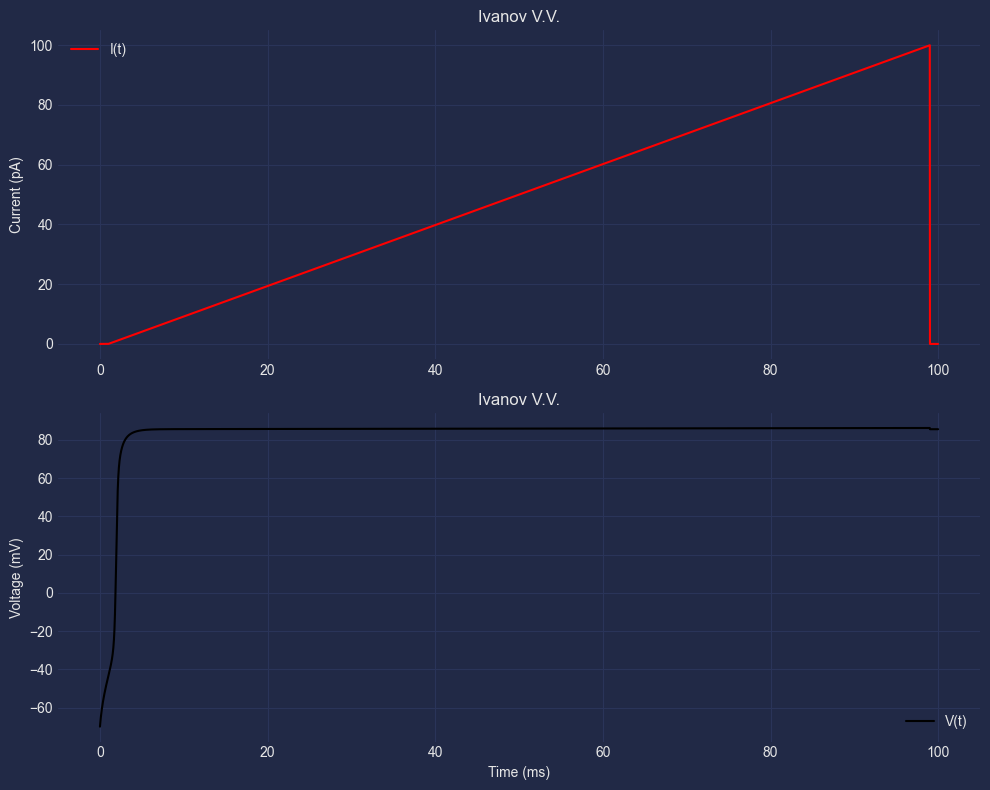

In [18]:
import mplcyberpunk
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

plt.style.use("cyberpunk")

class HodgkinHuxleyModel:
    def __init__(self, T0, dt):
        self.T0 = T0
        self.dt = dt

    def alpha_m(self, V):
        # Функція для alpha_m (зворотній трикутник)
        return 1.0 / (1 + np.exp(-(V + 30) / 5))

    def beta_m(self, V):
        # Функція для beta_m (зворотній трикутник)
        return 1.0 / (1 + np.exp((V + 30) / 5))

    def alpha_h(self, V):
        # Функція для alpha_h (зворотній трикутник)
        return 1.0 / (1 + np.exp(-(V + 50) / 10))

    def beta_h(self, V):
        # Функція для beta_h (зворотній трикутник)
        return 1.0 / (1 + np.exp((V + 50) / 10))

    def alpha_n(self, V):
        # Функція для alpha_n (зворотній трикутник)
        return 1.0 / (1 + np.exp(-(V + 40) / 5))

    def beta_n(self, V):
        # Функція для beta_n (зворотній трикутник)
        return 1.0 / (1 + np.exp((V + 40) / 5))

    def I_func(self, t):
        if 1 <= t <= (self.T0 - 1):
            return 100 * (t - 1) / (self.T0 - 2)
        return 0

    def HH_model(self, Y, t):
        V, m, h, n = Y
        I = self.I_func(t)
        dV = I - 120 * m ** 3 * h * (V - 115) - 36 * n ** 4 * (V + 12) - 0.3 * (V - 10.6)
        dm = self.alpha_m(V) * (1 - m) - self.beta_m(V) * m
        dh = self.alpha_h(V) * (1 - h) - self.beta_h(V) * h
        dn = self.alpha_n(V) * (1 - n) - self.beta_n(V) * n
        return [dV, dm, dh, dn]

    def simulate(self):
        time = np.arange(0, self.T0, self.dt)
        init_conditions = [-70, 0.05, 0.54, 0.34]
        result = odeint(self.HH_model, init_conditions, time)
        V, m, h, n = result.T
        return V, m, h, n, time

    def plot(self, V, time):
        plt.figure(figsize=(10, 8))
        plt.subplot(2, 1, 1)
        plt.plot(time, [self.I_func(t) for t in time], 'r', label="I(t)")
        plt.ylabel('Current (pA)')
        plt.title("Ivanov V.V.")
        plt.legend()
        plt.subplot(2, 1, 2)
        plt.plot(time, V, 'k', label="V(t)")
        plt.xlabel('Time (ms)')
        plt.ylabel('Voltage (mV)')
        plt.title("Ivanov V.V.")
        plt.legend()
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    T0 = 100
    dt = 0.01
    model = HodgkinHuxleyModel(T0, dt)
    V, m, h, n, time = model.simulate()
    model.plot(V, time)


# Завдання №2
Вивести на графік ефект "все-або-нічого", оцінити різницю амплітуд подразнення.

Тривалість симуляції 10 мс. Тривалість подразнення нейрона від 0.05 до 0.5 мс, конкретне значення в таблиці.

Peak Amplitude for Stimulus Duration 1: 85.55097189849808 mV
Peak Amplitude for Stimulus Duration 2: 85.55758294462143 mV


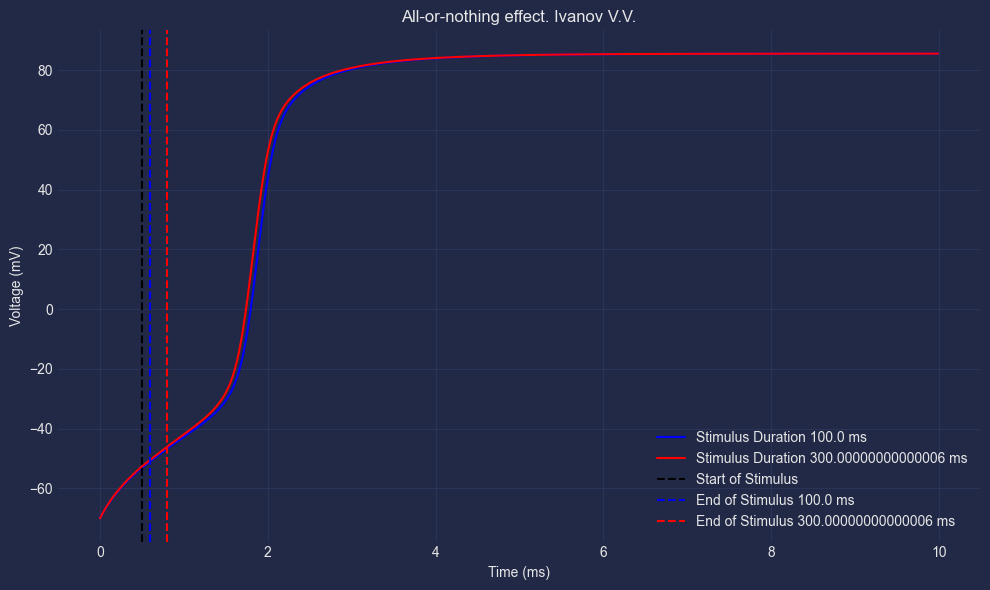

In [19]:
def all_or_nothing_simulation(T0, dt, stimulus_duration):
    model = HodgkinHuxleyModel(T0, dt)

    # Simulate without stimulus
    model.I_func = lambda t: 0
    V_rest, m, h, n, time = model.simulate()

    # Simulate with the first stimulus (0.1 ms duration, smaller amplitude)
    model.I_func = lambda t: 0 if (0.5 <= t <= 0.5 + stimulus_duration) else 1
    V1, m, h, n, time = model.simulate()
    peak_amplitude1 = max(V1)  # Peak amplitude of the first response

    # Simulate with the second stimulus (0.1 ms duration, larger amplitude)
    model.I_func = lambda t: 0 if (0.5 <= t <= 0.5 + stimulus_duration) else 2
    V2, m, h, n, time = model.simulate()
    peak_amplitude2 = max(V2)  # Peak amplitude of the second response

    return V_rest, V1, V2, time, peak_amplitude1, peak_amplitude2


def plot_all_or_nothing(V1, V2, time, stimulus_duration):
    plt.figure(figsize=(10, 6))

    plt.plot(time, V1, 'b', label=f"Stimulus Duration {stimulus_duration*1000} ms")
    plt.plot(time, V2, 'r', label=f"Stimulus Duration {(stimulus_duration+0.2)*1000} ms")

    # Add vertical lines indicating the stimulus duration
    plt.axvline(x=0.5, color='k', linestyle='--', label='Start of Stimulus')
    plt.axvline(x=0.5 + stimulus_duration, color='b', linestyle='--', label=f'End of Stimulus {stimulus_duration*1000} ms')
    plt.axvline(x=0.5 + stimulus_duration + 0.2, color='r', linestyle='--', label=f'End of Stimulus {(stimulus_duration+0.2)*1000} ms')

    plt.ylabel('Voltage (mV)')
    plt.xlabel('Time (ms)')
    plt.title("All-or-nothing effect. Ivanov V.V.")
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    T0 = 10
    dt = 0.01
    stimulus_duration = 0.1  # Set the desired stimulus duration
    V_rest, V1, V2, time, peak_amplitude1, peak_amplitude2 = all_or_nothing_simulation(T0, dt, stimulus_duration)

    print(f"Peak Amplitude for Stimulus Duration 1: {peak_amplitude1} mV")
    print(f"Peak Amplitude for Stimulus Duration 2: {peak_amplitude2} mV")

    plot_all_or_nothing(V1, V2, time, stimulus_duration)